<a href="https://colab.research.google.com/github/AliARajabi/deep-learning/blob/main/ResNet50/using_trained_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/amanchadha/coursera-deep-learning-specialization/raw/master/C4%20-%20Convolutional%20Neural%20Networks/Week%202/ResNets/ResNet50.h5.zip


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("ResNet50.h5.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,ZeroPadding2D, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, Flatten, Dense, AveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

!git clone https://github.com/AliARajabi/deep-learning.git

fatal: destination path 'deep-learning' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
import h5py
train_d = h5py.File('/content/deep-learning/sign language using CNN/train_signs.h5','r')
x_train = np.array(train_d["train_set_x"])
y_train = np.array(train_d["train_set_y"])

test_d = h5py.File('/content/deep-learning/sign language using CNN/test_signs.h5','r')
x_test = np.array(test_d["test_set_x"])
y_test = np.array(test_d["test_set_y"])
classes=np.array(train_d["list_classes"])
print(classes)

[0 1 2 3 4 5]


In [ ]:
x_train = x_train/255
x_test = x_test/255

y_train = np.eye(len(classes))[np.array(y_train).reshape(-1)]
y_test = np.eye(len(classes))[np.array(y_test).reshape(-1)]


In [ ]:
model = load_model('ResNet50.h5') 

In [ ]:
preds = model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

4/4 [==============================] - 3s 344ms/step - loss: 0.5302 - accuracy: 0.8667
Loss = 0.5301783084869385
Test Accuracy = 0.8666666746139526


In [ ]:
from PIL import Image
import numpy as np
from skimage import transform
import scipy.misc
import imageio
from skimage.transform import resize

def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (64, 64, 3))
   np_image = np.expand_dims(np_image, axis=0)
   image = np.array(imageio.imread(filename,pilmode='RGB'))
   my_image = resize(image, (64, 64))
   plt.imshow(my_image)
   plt.xticks([])
   plt.yticks([])
   plt.grid(False)
   return np_image

class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = 


array([[7.1127261e-06, 8.2586217e-04, 9.9895275e-01, 1.6330625e-07,
        2.1362530e-04, 4.7455697e-07]], dtype=float32)

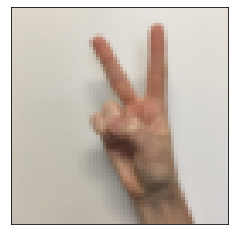

In [ ]:
image = load("/content/my_image.jpg")
print("class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ")
model.predict(image)

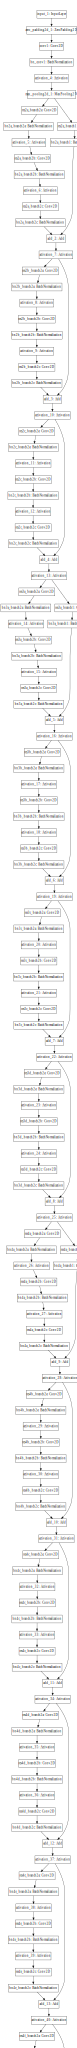

In [ ]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))